# Peru


In [1]:
import os
import pandas as pd
import json
import gspread as gs
import warnings

from utils.clean import wrangling
from utils.top_imports import top_importadores
from utils.data_anual import annual_data
from utils.vol_origenes import analisis_origenes

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

warnings.simplefilter("ignore")

### ~~~ ###
###     PATH     ###
### ~~~ ###

location_2013 = "./data/283525_Importaciones_2013.xlsx"
location_2014 = "./data/283525_Importaciones_2014.xlsx"
location_2015 = "./data/283525_Importaciones_2015.xlsx"
location_2016 = "./data/283525_Importaciones_2016.xlsx"
location_2017 = "./data/283525_Importaciones_2017.xlsx"
location_2018 = "./data/283525_Importaciones_2018.xlsx"
location_2019 = "./data/283525_Importaciones_2019.xlsx"
location_2020 = "./data/283525_Importaciones_2020.xlsx"
location_2021 = "./data/283525_Importaciones_2021.xlsx"
location_2022 = "./data/283525_Importaciones_2022.xlsx"
location_2023 = "./data/283525_Importaciones_2023.xlsx"

### ~~~ ###
###     DATA     ###
### ~~~ ###

data2013 = pd.read_excel(location_2013, engine="openpyxl")
data2014 = pd.read_excel(location_2014, engine="openpyxl")
data2015 = pd.read_excel(location_2015, engine="openpyxl")
data2016 = pd.read_excel(location_2016, engine="openpyxl")
data2017 = pd.read_excel(location_2017, engine="openpyxl")
data2018 = pd.read_excel(location_2018, engine="openpyxl")
data2019 = pd.read_excel(location_2019, engine="openpyxl")
data2020 = pd.read_excel(location_2020, engine="openpyxl")
data2021 = pd.read_excel(location_2021, engine="openpyxl")
data2022 = pd.read_excel(location_2022, engine="openpyxl")
data2023 = pd.read_excel(location_2023, engine="openpyxl")


In [2]:
# MERGE
dfs = [data2013, data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022, data2023]  

print("Este df tiene (filas, col):\n___________________")

for df in dfs:
    print(f"> {df['Fecha'][0].year}: {df.shape}\n~~~~~~~~~~~~~~~~~~~")


Este df tiene (filas, col):
___________________
> 2013: (92, 32)
~~~~~~~~~~~~~~~~~~~
> 2014: (119, 32)
~~~~~~~~~~~~~~~~~~~
> 2015: (94, 32)
~~~~~~~~~~~~~~~~~~~
> 2016: (112, 32)
~~~~~~~~~~~~~~~~~~~
> 2017: (115, 32)
~~~~~~~~~~~~~~~~~~~
> 2018: (86, 32)
~~~~~~~~~~~~~~~~~~~
> 2019: (85, 32)
~~~~~~~~~~~~~~~~~~~
> 2020: (63, 32)
~~~~~~~~~~~~~~~~~~~
> 2021: (33, 32)
~~~~~~~~~~~~~~~~~~~
> 2022: (63, 32)
~~~~~~~~~~~~~~~~~~~
> 2023: (9, 32)
~~~~~~~~~~~~~~~~~~~


In [3]:
col = [col for col in data2016.columns]
col

# data2013.head(2)


['DUA',
 'Item',
 'Fecha',
 'Importador',
 'RUC',
 'Regimen',
 'Código NCM',
 'Aduana',
 'Vía Transporte',
 'Nombre Transportista',
 'Manifiesto',
 'Conocimiento',
 'Puerto de Embarque',
 'País de Origen',
 'Pais de Procedencia',
 'Cantidad Comercial',
 'Unidad de Medida',
 'Cant. VF',
 'U.V.F.',
 'Bultos',
 'Tipo de Bulto',
 'U$S FOB',
 'U$S FOB Unit.',
 'U$S CIF',
 'U$S Unitario',
 'U$S Flete',
 'Kgs. Netos',
 'Kgs. Brutos',
 'Proveedor',
 'Marca',
 'Descripción de Mercadería',
 'Descripción para Filtro']

In [4]:
results_dfs = wrangling(dfs)




> MUNGING HISTORICAL DATA:

~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2013
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2014
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2015
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2016
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2017
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2018
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2019
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio

In [5]:
print("> Estadísticos del precio en el año per ton:\n___________________")

last_iterated_year = None

for df in results_dfs:
    if df is None or df.empty:
        print(
            f"<!!!> No data available for {last_iterated_year+1}\n~~~~~~~~~~~~~~~~~~~")
    else:
        year = df['Fecha'].iloc[0].year
        print(
            f"- En el {year}:\n{df['U$S Unitario'].describe()}\n~~~~~~~~~~~~~~~~~~~")
        last_iterated_year = year


> Estadísticos del precio en el año per ton:
___________________
- En el 2013:
count    61.000000
mean      0.505410
std       0.058696
min       0.340000
25%       0.470000
50%       0.500000
75%       0.550000
max       0.620000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2014:
count    94.000000
mean      0.500319
std       0.064299
min       0.350000
25%       0.470000
50%       0.490000
75%       0.535000
max       0.610000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2015:
count    74.000000
mean      0.449865
std       0.093523
min       0.240000
25%       0.380000
50%       0.470000
75%       0.480000
max       0.590000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2016:
count    87.000000
mean      0.427126
std       0.093484
min       0.230000
25%       0.350000
50%       0.440000
75%       0.510000
max       0.550000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2017:
count    94.000000
mean      0.433936

In [6]:
results_dfs[-1].head(2)


,Código NCM,Fecha,País de Origen,Importador,Cantidad Comercial,Unidad de Medida,Tipo de Bulto,Proveedor,Aduana,Vía Transporte,U$S CIF,U$S FOB,Kgs. Netos,Marca,Descripción de Mercadería,Descripción para Filtro,U$S Unitario
0,283525,2023-01-03,Vietnam,DISAN PERU S.A,50,TM,No disponible,NO DISPONIBLE,MARITIMA DEL CALLAO,MARITIMO,30752.97,27697.9,50000,S/M,FOSFATO DICALCICO. S/M. S/M EN 2000 BAGS X 25 KG C/U USO INDUSTRIAL DICALCIUM PHOSPHATE (DCP) FEED GRADE LOTE: 11221201. F.MAN.: 12/11/2022. F.V.: 12/11/2025,FOSFATO DICALCICO. S/M. S/M EN 2000 BAGS X 25 KG C/U USO INDUSTRIAL DICALCIUM PHOSPHATE (DCP) FEED GRADE LOTE: 11221201. F.MAN.: 12/11/2022. F.V.: 12/11/2025,0.62
1,283525,2023-01-07,China,DISAN PERU S.A,50000,KG,No disponible,NO DISPONIBLE,MARITIMA DEL CALLAO,MARITIMO,34513.17,29500.0,50000,S/M,"FOSFATO GRANULAR BLANCO DCP 18% - SC25, S/M, S/M LOTE: 220920 , MFG. DATE: 20/09/2022, EXP DATE: 19/09/2024 USO INDUSTRIAL FOSFATO GRANULAR BLANCO DCP 18% - SC25 40 BAG X 1250 KG","FOSFATO GRANULAR BLANCO DCP 18% - SC25, S/M, S/M LOTE: 220920 , MFG. DATE: 20/09/2022, EXP DATE: 19/09/2024 USO INDUSTRIAL FOSFATO GRANULAR BLANCO DCP 18% - SC25 40 BAG X 1250 KG",0.69


In [7]:
annual_data = annual_data(results_dfs)
annual_data


- 2013 appended.
- 2014 appended.
- 2015 appended.
- 2016 appended.
- 2017 appended.
- 2018 appended.
- 2019 appended.
- 2020 appended.
- 2021 appended.
- 2022 appended.
- 2023 appended.
~~~~~~~~~~~~~~~~~~~
> Transition dictionary:
- NCM: ['283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525']

- Año: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

- Volumen Total: [6002.74, 7306.6, 6251.27, 6000.42, 7424.24, 4077.23, 4728.53, 2928.78, 1686.04, 4392.77, 431.0]



,Año,NCM,Volumen Total
0,2013,283525,6002.74
1,2014,283525,7306.60
2,2015,283525,6251.27
3,2016,283525,6000.42
4,2017,283525,7424.24
5,2018,283525,4077.23
6,2019,283525,4728.53
7,2020,283525,2928.78
8,2021,283525,1686.04
9,2022,283525,4392.77


In [8]:
top_importadores = top_importadores(results_dfs)
top_importadores


- Done with: BIONOVA S.A.C. (2013) 
- Done with: PRO-PREMIX NUTRICION S.R.L. (2013) 
- Done with: CORPORACION D INVERSIONES Y SERVICS. SAC (2013) 
- Done with: ALIMENTOS Y ADITIVOS VETERINARIOS E.I.R. (2013) 
- Done with: ABASTECEDORA AVICOLA VETERINARIA E.I.R.L (2013) 
- Done with: CUSA S.A.C. (2013) 
- Done with: VETERQUIMICA PERU S.A.C. (2013) 
- Done with: NEGOCIAR S.A.C. (2013) 
- Done with: PACO JARAMILLO PERSI (2013) 
- Done with: AGROVET FARM S.A. (2013) 
- Done with: BATTILANA NUTRICION SAC (2013) 
- Done with: QUIMICOS GOICOCHEA S.A.C. (2013) 
- Done with: ABASTECEDORA AVICOLA VETERINARIA E.I.R.L (2014) 
- Done with: QUIMICA SUIZA INDUSTRIAL DEL PERU S.A. (2014) 
- Done with: CORPORACION D INVERSIONES Y SERVICS. SAC (2014) 
- Done with: PRO-PREMIX NUTRICION S.R.L. (2014) 
- Done with: VETERQUIMICA PERU S.A.C. (2014) 
- Done with: NEGOCIAR S.A.C. (2014) 
- Done with: QUIMICOS GOICOCHEA S.A.C. (2014) 
- Done with: CUSA S.A.C. (2014) 
- Done with: PROVIGEN S.A.C. (2014) 
- Done 

,Año,Importador,Participacion,Precio Promedio,Proveedores,Volumen Total (TN)
2,2013,CORPORACION D INVERSIONES Y SERVICS. SAC,26%,530.0,"P.S.P.S.L. RM.2207ZHONGDA SQUARE, SINO-WORLD INTERNATIONAL GROUP LTD, PIONEERS PHARMAVET S.L.-P.S.P.S.L., ANDRES PINTALUBA S.A. C/ PRUDENCI, PIONEERS PHARMAVET S.L. -P.S.P.S.L, ANDRES PINTALUBAS.A.C/ PRUDENCI BE",1569.06
1,2013,PRO-PREMIX NUTRICION S.R.L.,18%,540.0,"FANO GROUP LIMITED, FANO GROUP LIMITED RM.1302 YONGFEN, FANO GROUP LIMITEDRM.1302YONGFENG, NANJING FANO BIOTECH CO.LTD., BRETANO CORP. TORTOLA BRITISH VIRGI, NANJING FANO BIOTECH CO.LTD RM.302, BRETANO CORP, FANO GROUP LIMITED RM. 1922-1927 B, FANO GROUP LIMITED RM.1922-1927BUI",1069.78
7,2013,NEGOCIAR S.A.C.,16%,530.0,YUNNAN COPPER INDUSTRY SUNWARD CHEM,950.00
5,2014,NEGOCIAR S.A.C.,37%,480.0,"JESSEN JESSEN GMBH CO.KG, BMPBULK MEDICINES& PHARMACEUTICALS GMBH BORNBARCH, BMPBULK MEDICINES&PHARMACEUTICALS GMBH BORNBARCH 1, QHCHEMICALS CO.LTD, QHCHEMICALS COLTD 21YONGXING INTERNATIONALNANTO, QHCHEMICALS COLTD21YONGXING INTERNATIONALNANTON, QHCHEMICALS COLTD21 YONGXING INTERNATIONALNANTON",2699.34
3,2014,PRO-PREMIX NUTRICION S.R.L.,19%,490.0,"FANO GROUP LIMITED RM.1922-1927BUI, FANO GROUP LIMITED, BMPBULK MEDICINES PHARMACEUTICALS GMBHBORNBARCH 1",1398.73
2,2014,CORPORACION D INVERSIONES Y SERVICS. SAC,17%,480.0,"PIONEERS PHARMAVET S.L.-P.S.P.S.L., ANDRES PINTALUBAS.A., NO DETERMINADO, SICHUAN LOMON PHOSPHOROUS PRODUCTS INCNO 23 GAO PE",1216.00
0,2015,PRO-PREMIX NUTRICION S.R.L.,25%,470.0,"FANO GROUP LIMITED, FANO GROUP LIMITEDRM1922-1927 BUILDING 2DEYING I, FANO GROUP LIMITEDRM1922-1927 BUILDING 2 DEYING, NO DETERMINADO",1549.18
4,2015,NEGOCIAR S.A.C.,18%,380.0,"JEBSEN & JESSEN GMBH & CO. KG, NO DETERMINADO, MEELUNIE B.V.",1145.00
8,2015,FOOD MARKETS S.A.C.,14%,350.0,FOOD MARKETS SAC,899.83
3,2016,E & M S.R.L.,28%,490.0,"RDI 55 BOULEVARD JULES VERGER BP 10180 35803 DINA, TIMAB IBERICA SU, TIMAB IBERICA SLU, RDI",1657.90


In [9]:
analisis_origenes = analisis_origenes(results_dfs)
analisis_origenes


- Done with: China (2013) 
- Done with: China (2014) 
- Done with: España (2014) 
- Done with: China (2015) 
- Done with: España (2015) 
- Done with: China (2016) 
- Done with: España (2016) 
- Done with: Marruecos (2016) 
- Done with: Vietnam (2016) 
- Done with: China (2017) 
- Done with: Vietnam (2017) 
- Done with: España (2017) 
- Done with: Turquía (2017) 
- Done with: Francia (2017) 
- Done with: China (2018) 
- Done with: Vietnam (2018) 
- Done with: España (2018) 
- Done with: Países Bajos (2018) 
- Done with: Turquía (2018) 
- Done with: Francia (2018) 
- Done with: China (2019) 
- Done with: Francia (2019) 
- Done with: Vietnam (2019) 
- Done with: España (2019) 
- Done with: Turquía (2019) 
- Done with: China (2020) 
- Done with: Vietnam (2020) 
- Done with: China (2021) 
- Done with: España (2021) 
- Done with: China (2022) 
- Done with: Vietnam (2022) 
- Done with: Vietnam (2023) 
- Done with: China (2023) 
~~~~~~~~~~~~~~~~~~~
> Current dataframe of the origins of each ye

,NCM,Año,Pais,Volumen Total (TN),Participacion en Vol. Total,No. Importaciones
0,283525,2013,China,6002.74,100%,61
0,283525,2014,China,7083.90,97%,74
1,283525,2014,España,222.70,3%,20
0,283525,2015,China,5684.35,91%,58
1,283525,2015,España,566.92,9%,16
0,283525,2016,China,4336.62,72%,48
1,283525,2016,España,1200.00,20%,31
2,283525,2016,Vietnam,409.80,7%,7
3,283525,2016,Marruecos,54.00,1%,1
0,283525,2017,China,4716.95,64%,54


# Graphs


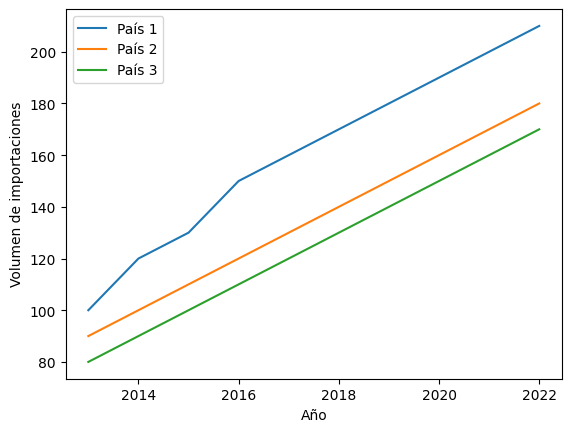

In [10]:
# GRAPHS (analisis_origenes)
import matplotlib.pyplot as plt

# Datos de ejemplo
volumenes = [[100, 120, 130, 150, 160, 170, 180, 190, 200, 210],
             [90, 100, 110, 120, 130, 140, 150, 160, 170, 180],
             [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]]

paises = ['País 1', 'País 2', 'País 3']

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar líneas para cada país
for i in range(len(volumenes)):
    ax.plot(range(2013, 2023), volumenes[i], label=paises[i])

# Configurar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de importaciones')

plt.show()


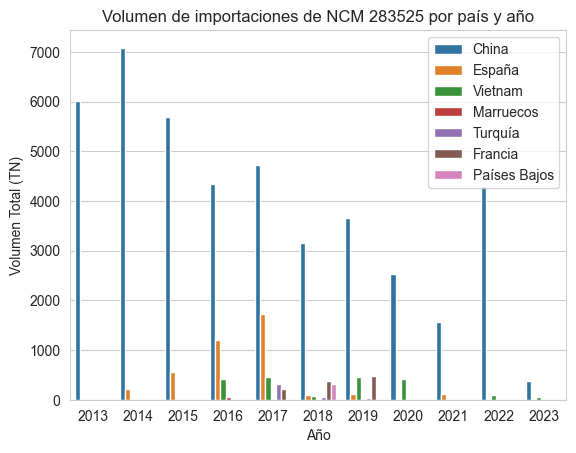

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# # Filtrar datos por NCM
# df_ncm = df[df['NCM']==283525]


# Gráfico de barras agrupado por país
sns.barplot(x='Año', y='Volumen Total (TN)',
            hue='Pais', data=analisis_origenes)

# Título del gráfico
plt.title('Volumen de importaciones de NCM 283525 por país y año')
plt.legend(loc='upper right')

# Mostrar gráfico
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


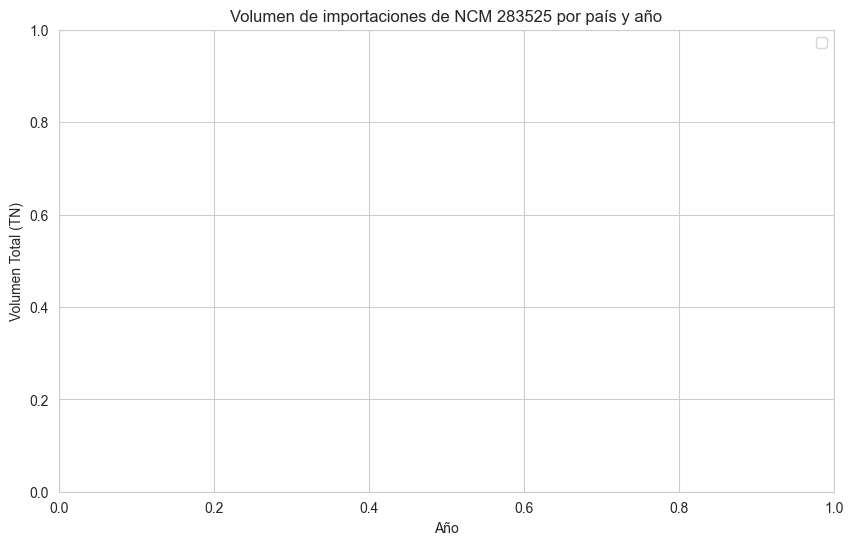

In [12]:
# Filtrar datos por NCM y agrupar por país
df_ncm_pais = analisis_origenes[analisis_origenes['NCM'] == 283525].groupby(
    'Pais')

# Gráfico de línea por país
fig, ax = plt.subplots(figsize=(10, 6))
for pais, data in df_ncm_pais:
    ax.plot(data['Año'], data['Volumen Total (TN)'], label=pais)

# Título del gráfico y etiquetas de los ejes
ax.set_title('Volumen de importaciones de NCM 283525 por país y año')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen Total (TN)')

# Leyenda del gráfico
ax.legend()

# Mostrar gráfico
plt.show()
